1. Download Dataset

In [ ]:
#!pip install -q kaggle

1.1 uploaded kaggle

In [ ]:
#!mkdir -p ~/.kaggle
#!cp kaggle.json ~/.kaggle/

#!chmod 600 ~/.kaggle/kaggle.json #fungsi untuk memberikan izin akses file

1.2 Processing download

In [ ]:
#!kaggle datasets download -d akshaydattatraykhare/diabetes-dataset
#diabetes-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)

#import zipfile

#with zipfile.ZipFile('diabetes-dataset.zip', 'r') as zip_ref:
#  zip_ref.extractall('/content/')

2. Import Library

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC

3. Load & Display Dataset

In [3]:
df = pd.read_csv('/content/diabetes.csv')
display(df.head(2)) # display fisrt record of data
display(df.tail(2)) # display last 4 rocord of data
display(df.sample(4)) # display randomly any number of record of data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
262,4,95,70,32,0,32.1,0.612,24,0
44,7,159,64,0,0,27.4,0.294,40,0
278,5,114,74,0,0,24.9,0.744,57,0
477,7,114,76,17,110,23.8,0.466,31,0


Description

3.1 The shape of dataset

In [4]:
#number of rows and colums
df.shape

(768, 9)

3.2 List types of all columns

In [5]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

3.3 Info of the dataset

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


3.4 Summary of the dataset

In [7]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Check Null Value

4. Data Cleaning

4.1 Drp the duplicte


In [8]:
# check the shape before drop duplicate
df.shape

(768, 9)

4.2 Check the NULL value

In [9]:
# check of null values,
# check the missing value in any column,
# display number of null value in every column in dataset.
df.isnull().sum()

df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

check the no.of Zero value in dataset

In [28]:
print ('No of zero value in Glucose', df[df['Glucose']==0].shape[0])
print ('No of zero value in BloodPressure', df[df['BloodPressure']==0].shape[0])
print ('No of zero value in SkinThickness', df[df['SkinThickness']==0].shape[0])

print ('No of zero value in Insulin', df[df['Insulin']==0].shape[0])
print ('No of zero value in BMI', df[df['BMI']==0].shape[0])


No of zero value in Glucose 0
No of zero value in BloodPressure 0
No of zero value in SkinThickness 0
No of zero value in Insulin 0
No of zero value in BMI 0


Replace the no.of Zero value with mean of columns

no of zero value in Glucose 0
Negative (0): 500
Positive (1): 268


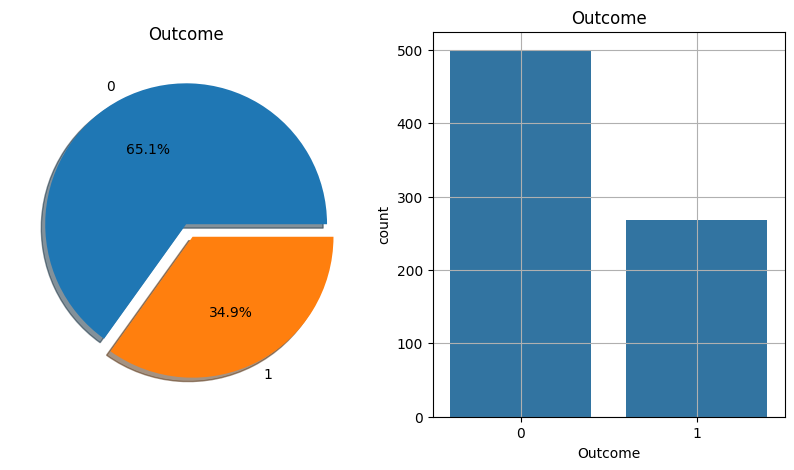

In [14]:
df['Glucose']=df['Glucose'].replace(0,df['Glucose'].mean())
print('no of zero value in Glucose',df[df['Glucose']==0].shape[0])

df['BloodPressure']=df['BloodPressure'].replace(0,df['BloodPressure'].mean())
df['SkinThickness']=df['SkinThickness'].replace(0,df['SkinThickness'].mean())
df['Insulin']=df['Insulin'].replace(0,df['Insulin'].mean())
df['BMI']=df['BMI'].replace(0,df['BMI'].mean())

df.describe()

# utcome count plot
f,ax=plt.subplots (1,2,figsize=(10,5))
df['Outcome'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0], shadow=True)
ax[0].set_title('Outcome')
ax[0].set_ylabel('')
sns.countplot(x='Outcome',data=df,ax=ax[1])
ax[1].set_title('Outcome')
N,P = df['Outcome'].value_counts()
print('Negative (0):',N)
print('Positive (1):',P)
plt.grid()
plt.show()

Histogram of aech feature

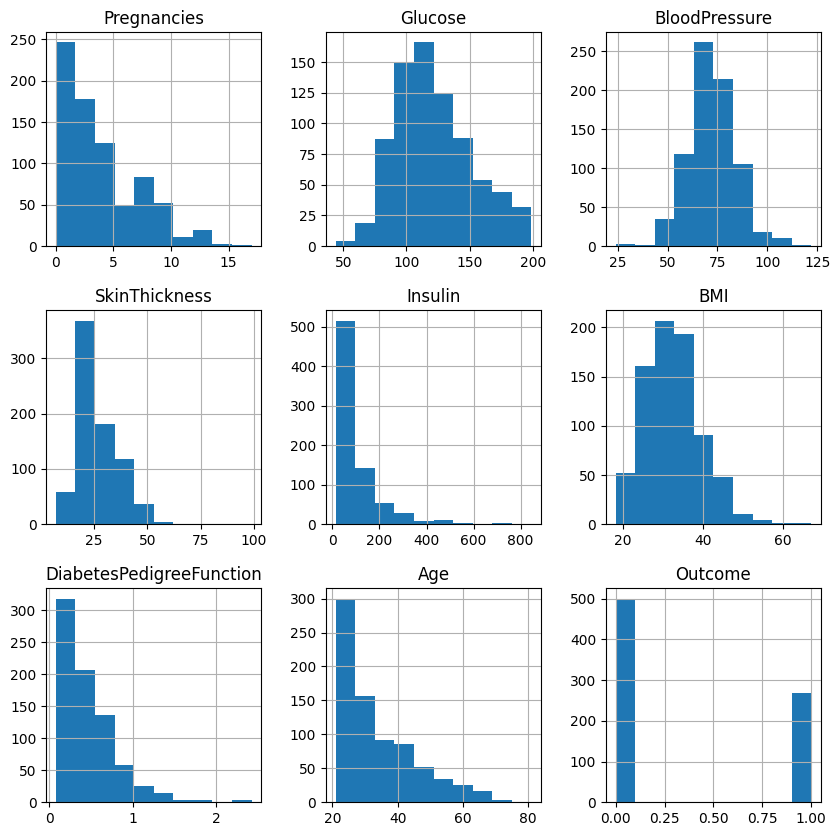

In [15]:
df.hist (bins=10,figsize=(10,10))
plt.show()

Scatter Plaot

In [17]:
from pandas.plotting import scatter_matrix
scatter_matrix(df, figsize = (20,20));

Analyzing relationships between variable

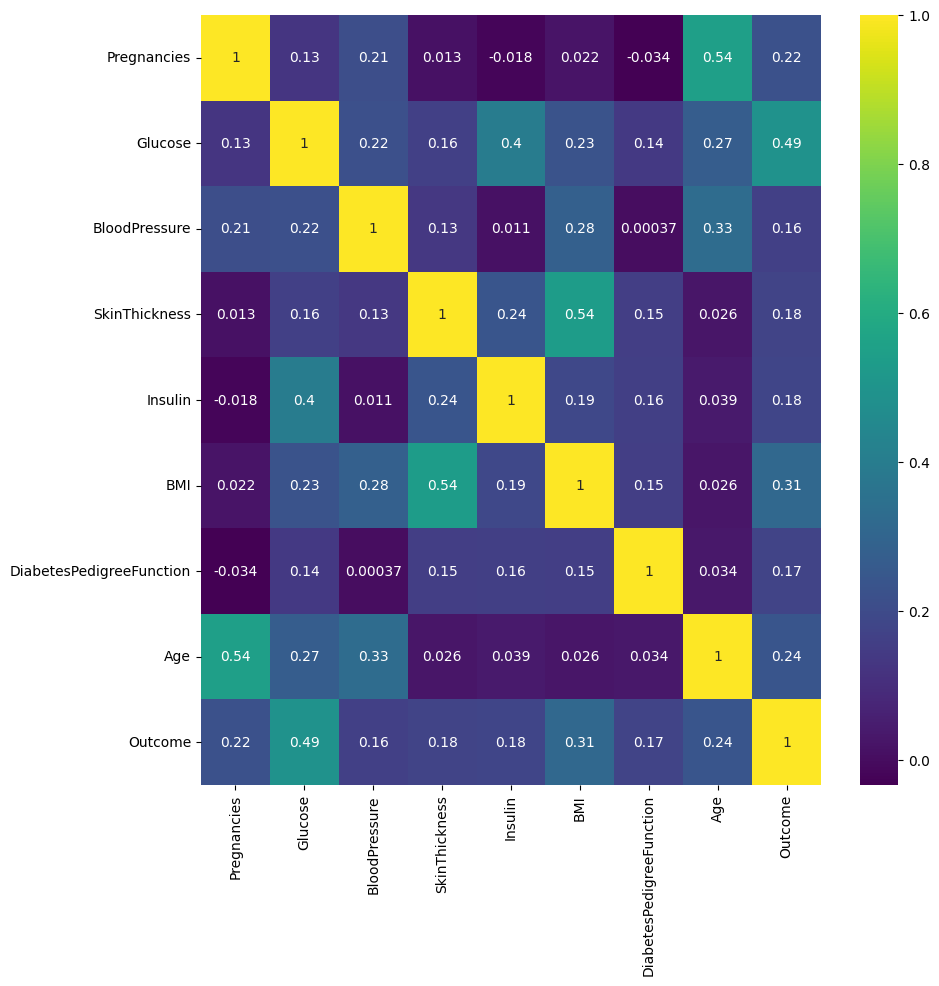

In [22]:
import seaborn as sns
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(10,10))
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="viridis")

5. Split the data frame into X & Y



In [23]:
target_name = 'Outcome'
y = df[target_name]
x = df.drop(target_name, axis=1)

x.head()

y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

6. Apply Feature Scalling

In [24]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x)
SSX = scaler.transform(x)

7. Train Test Split

In [25]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(SSX, y, test_size=0.2, random_state=7)

x_train.shape, y_train.shape

x_test.shape, y_test.shape

((154, 8), (154,))

8. Build the Classification Algorithms SVM

In [26]:
from sklearn.svm import SVC
sv=SVC()
sv.fit(x_train, y_train)

SVC()

9. Making Prediction

9.4 SVM

In [27]:
sv_pred=sv.predict(x_test)

sv_pred.shape

(154,)